# Importing the important libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import xml.etree.ElementTree as ET
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Mounting the drive to retreive the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/sorted_data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading data from a folder named sorted_data using ISO format because some symbols are not supported by the utf format

In [0]:
readMe = open('/content/drive/My Drive/data/sorted_data/books/positive.review','r',encoding="ISO-8859-1").readlines()
for i in range(100):
    print(readMe[i])

<review>

<unique_id>

0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"

</unique_id>

<unique_id>

1521

</unique_id>

<asin>

0375416811

</asin>

<product_name>

Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett

</product_name>

<product_type>

books

</product_type>

<product_type>

books

</product_type>

<helpful>



</helpful>

<rating>

5.0

</rating>

<title>

Founder of chick lit

</title>

<date>

August 24, 2006

</date>

<reviewer>

Erin Oakes "avid reader"

</reviewer>

<reviewer_location>

Central PA

</reviewer_location>

<review_text>

Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  



This is the book that started it all with the chick lit fever.  Bridget Jones is my hero! 

</review_text>

</review>

<review>

<unique_id>

188105201X:excellent_resource_for_principals!:onickre@mail.milwaukee.k12.wi.us

</unique_id>

<unique_id>

3294

</unique_id>

<asin>

188105201X

</

### Book folder contains 1000 positive and 1000 negative reviews

In [0]:
BooksPositRev = open('/content/drive/My Drive/data/sorted_data/books/positive.review','r',encoding="ISO-8859-1").readlines()
BooksNegatRev = open('/content/drive/My Drive/data/sorted_data/books/positive.review','r',encoding="ISO-8859-1").readlines()
print(BooksNegatRev.count('</review>\n'))
print(BooksPositRev.count('</review>\n'))

1000
1000


### Converting the give XML format to dictionary format of python

In [0]:
def Processing_XML_Reviews_Dictionnaire(ListReviews):
    count = 0
    Review = []
    Reviews = {}
    for i in range(len(ListReviews)):
        if ListReviews[i] != '</review>\n':
            if ListReviews[i] == '<review>\n' and ListReviews[i+1] == '<unique_id>\n':
                # unique_id
                Review.append('unique_id/'+ListReviews[i+2])
            if  ListReviews[i] == '<asin>\n':
                #asin
                Review.append('asin/'+ListReviews[i+1])    
            if  ListReviews[i] == '<product_name>\n':
                #productName
                Review.append('product_name/'+ListReviews[i+1])
            if ListReviews[i] == '<helpful>\n':
                #helpful
                Review.append('helpful/'+ListReviews[i+1])
            if ListReviews[i] == '<rating>\n':
                Review.append('rating/'+ListReviews[i+1])
            if ListReviews[i] == '<title>\n':
                Review.append('title/'+ListReviews[i+1])
            if ListReviews[i] == '<date>\n':
                Review.append('date/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer>\n':
                Review.append('reviewer/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer_location>\n':
                Review.append('reviewer_location/'+ListReviews[i+1])
            if ListReviews[i] == '<review_text>\n':
                Review.append('review_text/'+ListReviews[i+1])
        elif ListReviews[i] == '</review>\n':
            count = count + 1
            r = 'review'+ str(count) 
            Reviews[r] = Review
            Review = []
    return Reviews

### Using the function and printing the first positive review

In [0]:
NegRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksNegatRev)
posRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksPositRev)
posRev_Dict['review1']

['unique_id/0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"\n',
 'asin/0375416811\n',
 'product_name/Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett\n',
 'helpful/\n',
 'rating/5.0\n',
 'title/Founder of chick lit\n',
 'date/August 24, 2006\n',
 'reviewer/Erin Oakes "avid reader"\n',
 'reviewer_location/Central PA\n',
 "review_text/Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  \n"]

### Printing the number of positive and negative reviews parsed from the book folder and printing the 852 th review

In [0]:
print(len(NegRev_Dict))
print(len(posRev_Dict))
NegRev_Dict['review852']

1000
1000


['unique_id/1573833231:unexpectedly_valuable_book.._easy_to_read,_simple_but_powerful_themes:david_calhoun\n',
 'asin/1573833231\n',
 'product_name/The Christian Mind: How Should a Christian Think?: Books: Harry Blamires\n',
 'helpful/7 of 9\n',
 'rating/5.0\n',
 'title/Unexpectedly valuable book.. easy to read, simple but powerful themes\n',
 'date/October 2, 2005\n',
 'reviewer/David Calhoun\n',
 'reviewer_location/La Mirada, CA United States\n',
 "review_text/I was assigned this book for a college course and was greatly surprised at its quality.  Blamires had C.S. Lewis as a tutor, and I've read some of Lewis's writings and have found them to be above average but not particularly special (many people do find his works special of course).  Blamires, on the other hand, I find to be very unique - his book is top quality and very helpful.  I'm surprised this isn't a very popular book, as it ought to be.\n"]

#Generation of Data Frame for further processing

In [0]:
def Porcessing_Dictonnary_ToDataFrame(Dict):
    #on prepare notre dataframe pour les données
    df = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
    count = 0
    for i,k in Dict.items():
        df.loc[count] = [k[0].split("/")[1].split("\n")[0],k[1].split("/")[1].split("\n")[0]
                              ,k[2].split("/")[1].split("\n")[0],k[3].split("/")[1].split("\n")[0]
                              ,k[4].split("/")[1].split("\n")[0],k[5].split("/")[1].split("\n")[0]
                              ,k[6].split("/")[1].split("\n")[0],k[7].split("/")[1].split("\n")[0]
                              ,k[8].split("/")[1].split("\n")[0],k[9].split("/")[1].split("\n")[0]
        ]
        count = count + 1

    return df

In [0]:
BooksNeg = Porcessing_Dictonnary_ToDataFrame(NegRev_Dict)
BooksPos = Porcessing_Dictonnary_ToDataFrame(posRev_Dict)

In [0]:
BooksNeg.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"0375416811:founder_of_chick_lit:erin_oakes_""av...",0375416811,"Bridget Jones Diary: Books: Helen Fielding,Tra...",,5.0,Founder of chick lit,"August 24, 2006","Erin Oakes ""avid reader""",Central PA,"Bridget Jones, modern day woman, brillant and ..."
1,188105201X:excellent_resource_for_principals!:...,188105201X,Leadership and the New Science: Learning About...,3 of 3,5.0,Excellent resource for principals!,"July 6, 1999",ONICKRE@mail.milwaukee.k12.wi.us,"Milwaukee, Wisconsin",I am ordering copies for all 23 middle school ...


In [0]:
BooksPos.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"0375416811:founder_of_chick_lit:erin_oakes_""av...",0375416811,"Bridget Jones Diary: Books: Helen Fielding,Tra...",,5.0,Founder of chick lit,"August 24, 2006","Erin Oakes ""avid reader""",Central PA,"Bridget Jones, modern day woman, brillant and ..."
1,188105201X:excellent_resource_for_principals!:...,188105201X,Leadership and the New Science: Learning About...,3 of 3,5.0,Excellent resource for principals!,"July 6, 1999",ONICKRE@mail.milwaukee.k12.wi.us,"Milwaukee, Wisconsin",I am ordering copies for all 23 middle school ...


## The process performed till now for the Books is now applied to all the product folders

In [0]:
import os
indir = '/content/drive/My Drive/data/sorted_data/'
PositiveReviews = []
NegativeReviews = []
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        if f == "positive.review":
            log = open(os.path.join(root, f), 'r',encoding="ISO-8859-1").readlines()
            PositiveReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            print(os.path.join(root, f))
        if f == "negative.review":
            log = open(os.path.join(root, f), 'r',encoding="ISO-8859-1").readlines()
            NegativeReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            print(os.path.join(root, f))

/content/drive/My Drive/data/sorted_data/books/negative.review
/content/drive/My Drive/data/sorted_data/books/positive.review
/content/drive/My Drive/data/sorted_data/computer_&_video_games/negative.review
/content/drive/My Drive/data/sorted_data/computer_&_video_games/positive.review
/content/drive/My Drive/data/sorted_data/apparel/negative.review
/content/drive/My Drive/data/sorted_data/apparel/positive.review
/content/drive/My Drive/data/sorted_data/beauty/negative.review
/content/drive/My Drive/data/sorted_data/beauty/positive.review
/content/drive/My Drive/data/sorted_data/automotive/negative.review
/content/drive/My Drive/data/sorted_data/automotive/positive.review
/content/drive/My Drive/data/sorted_data/cell_phones_&_service/negative.review
/content/drive/My Drive/data/sorted_data/cell_phones_&_service/positive.review
/content/drive/My Drive/data/sorted_data/baby/negative.review
/content/drive/My Drive/data/sorted_data/baby/positive.review
/content/drive/My Drive/data/sorted_da

In [0]:
print(len(PositiveReviews))
print(len(NegativeReviews))
print(len(PositiveReviews[1]))
print(len(PositiveReviews[2]))

25
25
1000
1000


In [0]:
df_24_Postif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df_24_Negatif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df = pd.DataFrame()
for Rev in PositiveReviews:
    df = Porcessing_Dictonnary_ToDataFrame(Rev)
    df_24_Postif = pd.concat([df_24_Postif, df])
    df.empty

df1 = pd.DataFrame()
for Rev in NegativeReviews:
    df1 = Porcessing_Dictonnary_ToDataFrame(Rev)
    df_24_Negatif = pd.concat([df_24_Negatif, df1])
    df1.empty

print(len(df_24_Postif))
print(len(df_24_Negatif))
df_24_Postif.describe()
df_24_Negatif.describe()

df_24_Postif['Class'] = "pos" # review positives
df_24_Negatif['Class'] = "neg" #review Negative
Reviews  = pd.concat([df_24_Postif,df_24_Negatif])
Reviews.drop('unique_id',axis=1,inplace=True)

21972
16576


- Continuing the further process with the books review

In [0]:
BooksPos.drop('unique_id',axis=1,inplace=True)
BooksNeg.drop('unique_id',axis=1,inplace=True)

In [0]:
BooksPos['Class'] = "pos" # review positives
BooksNeg['Class'] = "neg" #review Negatif
BooksReviews = pd.concat([BooksPos,BooksNeg])

In [0]:
Reviews.iloc[0]

asin                                                        0375416811
product_name         Bridget Jones Diary: Books: Helen Fielding,Tra...
helpful                                                               
rating                                                             5.0
title                                             Founder of chick lit
date                                                   August 24, 2006
reviewer                                      Erin Oakes "avid reader"
reviewer_location                                           Central PA
review_text          Bridget Jones, modern day woman, brillant and ...
Class                                                              pos
Name: 0, dtype: object

In [0]:
Reviews.head(n=2)

,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
0,0375416811,"Bridget Jones Diary: Books: Helen Fielding,Tra...",,5.0,Founder of chick lit,"August 24, 2006","Erin Oakes ""avid reader""",Central PA,"Bridget Jones, modern day woman, brillant and ...",pos
1,188105201X,Leadership and the New Science: Learning About...,3 of 3,5.0,Excellent resource for principals!,"July 6, 1999",ONICKRE@mail.milwaukee.k12.wi.us,"Milwaukee, Wisconsin",I am ordering copies for all 23 middle school ...,pos


# Tokenization
It is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
There are three basic forms:-
- Text into sentences tokenization
- Sentences into words tokenization
- Sentences using regular expressions tokenization

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/tokenizer.jpg)

In [0]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer

import nltk
nltk.download('punkt')

def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(Reviews.iloc[0,8])
print("Words ",Words)
print("Sents ",Sents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Words  ['Bridget', 'Jones', ',', 'modern', 'day', 'woman', ',', 'brillant', 'and', 'does', "n't", 'know', 'it', ',', 'prone', 'to', 'accidents', 'and', 'mess', 'ups', 'but', 'manages', 'to', 'come', 'out', 'of', 'them', '.']
Sents  ["Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them."]


# Removal of StopWords
Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

We can remove stopwords while performing the following tasks:

- Text Classification
 - Spam Filtering
 - Language Classification
 - Genre Classification
- Caption Generation
- Auto-Tag Generation

As we are going to perform Text classification we are going to require removal of stopwords.

Here, we are using **NLTK's corpus because it contains stopwords from 16 different languages** .

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'no', 'its', 'their', 'doesn', 'hasn', 'most', 'where', 'mustn', 'is', 'the', 'ours', 'did', "won't", 'through', 'your', 'to', 'then', 's', 'there', 'while', 'both', 'other', "isn't", 'over', 'being', 'been', 'mightn', 'that', 'he', 'were', 'out', 'didn', "you've", 'such', 'now', "weren't", "she's", 'whom', 'does', 'me', 'down', "you'll", 'itself', 'are', 'when', 'on', "hadn't", 'has', 'but', "didn't", 'she', 'at', 'shouldn', 'into', 'same', 've', 'own', 'these', 'wasn', 'o', 'as', 'what', 'do', 'above', "hasn't", 'nor', "couldn't", 't', 'won', 'further', 'you', 'which', 'after', 'our', 'my', "needn't", 'y', "wasn't", 'd', 'am', 'each', 'more', 'all', "shan't", 'myself', 'him', 'from', 'some', 'doing', 'they', 'of', 'couldn', "you'd", "mustn't", 'have', 'just', 'if', 'for', 'under', "haven't", 'and', 'against', "should've", 'below', 'will', 'with', 'up', 'we', 'll', 'before',

# WordCloud

A word cloud is an image made of words that together resemble a cloudy shape.
The size of a word shows how important it is e.g. how often it appears in a text — its frequency.

We typically use word clouds to easily produce a summary of large documents (reports, speeches), to create art on a topic (gifts, displays) or to visualise data (tables, surveys).

As we have eliminated the stop words, we can visualize them using the WordCloud.

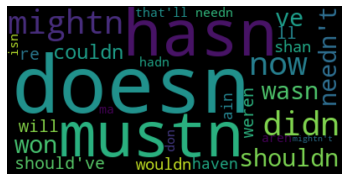

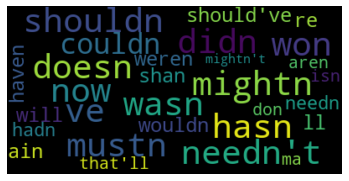

In [0]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(stop_words))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(stop_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text Normalization
In any natural language, words can be written or spoken in more than one form depending on the situation.

Text normalization is a process of transforming a word into a single canonical form. This can be done by two processes:
- Stemming
- Lemmatization

![alt text](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

# Stemming

Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving a better text normalization most of the time, and often includes the removal of derivational affixes.

![alt text](https://nlp.stanford.edu/IR-book/html/htmledition/img100.png)

**We are going to use the Porter stemmer for performing stemming of our reviews**

In [0]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print(Stemmed_Words)

['bridget', 'jone', ',', 'modern', 'day', 'woman', ',', 'brillant', "n't", 'know', ',', 'prone', 'accid', 'mess', 'up', 'manag', 'come', '.']


# Lemmatization

Rather than using a stemmer, we can use a lemmatizer , a tool from Natural Language Processing which does full morphological analysis to accurately identify the lemma for each word. Doing full morphological analysis produces at most very modest benefits for retrieval.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

![alt text](https://searchingforbole.files.wordpress.com/2018/01/re-learning-english-multiple1.png?w=624)


Lemmatization tracing the words back to it's lemma


**We are going to use the Wordnet Corpora for lemmatization of our reviews**


In [0]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print(Lemmatized_Words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['Bridget', 'Jones', ',', 'modern', 'day', 'woman', ',', 'brillant', "n't", 'know', ',', 'prone', 'accident', 'mess', 'ups', 'manages', 'come', '.']


## Implementing the word normalization techniques and visualizing one of the results.



In [0]:
ListWords =  [RegExpTokenizer(m) for m in list(Reviews['review_text'])]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Stemming
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])

['I', 'am', 'ordering', 'copies', 'for', 'all', '23', 'middle', 'school', 'principals', 'and', 'the', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'school', 'programs', 'in', 'the', 'Milwaukee', 'Public', 'Schools', 'system', 'We', 'will', 'use', 'Wheatley', 's', 'book', 'as', 'the', 'primary', 'resource', 'for', 'our', 'professional', 'growth', 'at', 'our', 'MPS', 'Middle', 'School', 'Principals', 'Collaborative', 'institute', 'August', '9', '11', '1999', 'We', 'are', 'not', 'just', 'concerned', 'with', 'reform', 'we', 'seek', 'renewal', 'as', 'well', 'Wheatley', 'provides', 'the', 'basis', 'She', 'notes', 'that', 'Einstein', 'said', 'that', 'a', 'problem', 'cannot', 'be', 'solved', 'from', 'the', 'same', 'consciousness', 'that', 'created', 'it', 'The', 'entire', 'book', 'is', 'a', 'marvelous', 'exploration', 'of', 'this', 'philosophy']
['I', 'ordering', 'copies', '23', 'middle', 'school', 'principals', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'sc

## Finding the most redundant and important words from the corpus

In [0]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    return all_words

# Vizualization

### Vizualizing the most important words on the word cloud

Counted the Words!!! 48943


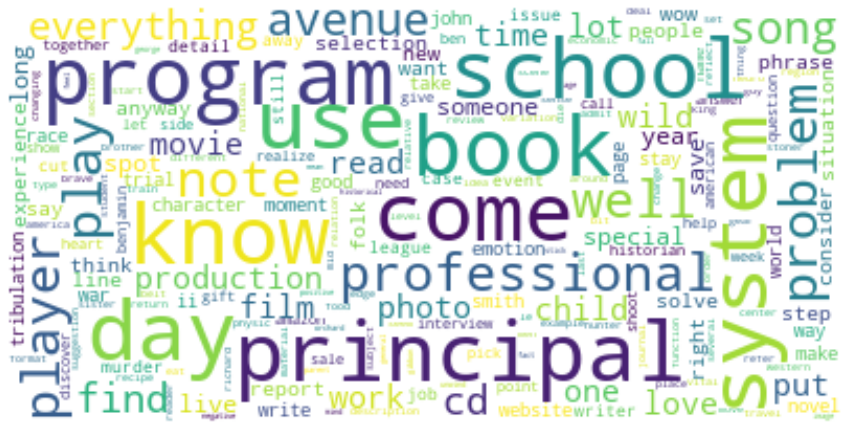

In [0]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Counted the Words!!!",len(all_words))

### Plotting the most common 10 words on the bar chart

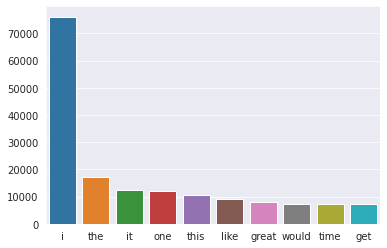

In [0]:
import seaborn as sns
# visualize food data
from sklearn.manifold import TSNE
all_words = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### Removing the irrelevant words and storing the rest of the words in the BagOfWords

Delete words that are <=3 letters because generaly they are Pronouns and don't add to the sentiment of the text

In [0]:

#ListWords To lower case
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
    return ListWords
def eliminate_irrelevent_Word(Word):
    #print(ListWords)
    #elimnate words
    Word = RegExpTokenizer(Word)
    Word = [item.lower() for item in Word]
    for m in Word:
        if len(m) <=3:
            Word.remove(m)
        if m == 'this':
            Word.remove(m)
    return Word

### Frequency didtribution plot for the most important words

ERROR! Session/line number was not unique in database. History logging moved to new session 61
All Words length  47478


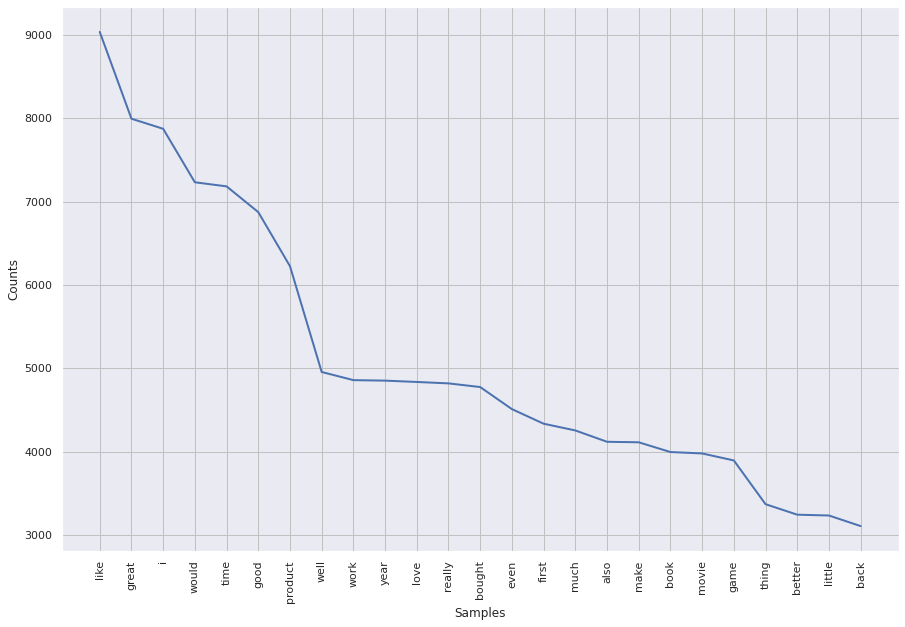

In [0]:
# Figures inline and set visualization style
ListWords = eliminate_irrelevent_Words(ListWords)
all_words = Bag_Of_Words(ListWords)
print("All Words length ",len(all_words))
%matplotlib inline
sns.set()
ax = plt.figure(figsize=(15,10))# Create freq dist and plot
freqdist1 = FreqDist(all_words)
freqdist1.plot(25)

### Document Representation

Storing the Reviews and class together by shuffling their order but keeping the pair together.

In [0]:
import random
def Create_Document(Reviews,ListWords):
    ListClass = list(Reviews['Class'])
    Documents =  []
    for m in range(len(ListWords)):
        Documents.append((ListWords[m],ListClass[m]))
    print(Documents[0])
    #shuffle
    random.shuffle(Documents)
    return Documents
Documents = Create_Document(Reviews,ListWords)

(['bridget', 'jones', 'modern', 'woman', 'brillant', 'know', 'prone', 'accident', 'mess', 'manages', 'come'], 'pos')


### Finding Features

- We return a dictionary with the words as key and existence 'True' or 'False' in our dictionary of words i.e. 'Most_Comm_Word' as value
- 100 is a parameter that can be modified which represents the 100 most repeated words

In [0]:
def find_features(document,all_words,nbr_word):
    Most_Comm_Word = []    
    for w in all_words.most_common(nbr_word):
        Most_Comm_Word.append(w[0])

    word_features = Most_Comm_Word
    words = RegExpTokenizer(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
print(find_features('im road going to tunisia .',all_words,100))

{'like': False, 'great': False, 'i': False, 'would': False, 'time': False, 'good': False, 'product': False, 'well': False, 'work': False, 'year': False, 'love': False, 'really': False, 'bought': False, 'even': False, 'first': False, 'much': False, 'also': False, 'make': False, 'book': False, 'movie': False, 'game': False, 'thing': False, 'better': False, 'little': False, 'back': False, 'used': False, 'look': False, 'best': False, 'could': False, 'they': False, 'still': False, 'magazine': False, 'never': False, 'price': False, 'many': False, 'easy': False, 'made': False, 'quality': False, 'camera': False, 'problem': False, 'think': False, 'month': False, 'know': False, 'read': False, 'want': False, 'take': False, 'find': False, 'review': False, 'one': False, 'film': False, 'money': False, 'need': False, 'come': False, 'item': False, 'nice': False, 'people': False, 'amazon': False, 'every': False, 'found': False, 'using': False, 'since': False, 'play': False, 'ever': False, 'give': False

### Creating a pickel file for classifier to be saved in the directory

In [0]:
import pickle
def Pickle_Save_Classifer(classifier,Test_Set):
    Classifier_o = open('NaiveBayes Score Model :'+str(nltk.classify.accuracy(classifier, Test_Set)*100)+'.pickle','wb')
    classifier = pickle.load(Classifier_o)
    Classifier_o.close()
    return classifier

### Dumping the pickel file of our classifier model which could be used later on

In [0]:
def Pickle_open_Classifer(path):
    SaveClassifier = open(path,'rb')
    pickle.dump(classifier,SaveClassifier)
    SaveClassifier.close()

### Creating the feature sets using the features and the document

In [0]:
def Features_Set(all_words,Documents,nbr_word):
    featuresets = []
    for rev,cat in Documents:
        feature = find_features(' '.join(rev),all_words,nbr_word)
        featuresets.append((feature,cat))
    return featuresets

In [0]:
featuresets = Features_Set(all_words,Documents,100)

### Splitting the feature sets into train and test sets

In [0]:
from sklearn.model_selection import train_test_split
Train_Set, Test_Set = train_test_split(featuresets, test_size=0.20, random_state=42)
print(Train_Set[26])

({'like': True, 'great': False, 'i': False, 'would': False, 'time': False, 'good': False, 'product': False, 'well': False, 'work': False, 'year': False, 'love': False, 'really': False, 'bought': False, 'even': False, 'first': False, 'much': False, 'also': False, 'make': False, 'book': True, 'movie': False, 'game': False, 'thing': False, 'better': False, 'little': False, 'back': False, 'used': False, 'look': False, 'best': False, 'could': False, 'they': False, 'still': False, 'magazine': False, 'never': False, 'price': False, 'many': False, 'easy': False, 'made': False, 'quality': False, 'camera': False, 'problem': False, 'think': False, 'month': False, 'know': False, 'read': False, 'want': False, 'take': False, 'find': False, 'review': False, 'one': False, 'film': False, 'money': False, 'need': False, 'come': False, 'item': False, 'nice': False, 'people': False, 'amazon': False, 'every': False, 'found': False, 'using': False, 'since': False, 'play': False, 'ever': False, 'give': False,

### Svaing our Dataframe, Featuresets and Documents inform of pickle file because it took us a long time to create

In [0]:
with open("FeaturesSet100Words.pql", "wb") as fp:   #Pickling
    pickle.dump(featuresets, fp)
!cp FeaturesSet100Words.pql "/content/drive/My Drive/data/sorted_data/"
with open("Document.pql", "wb") as fp:   #Pickling
    pickle.dump(Documents, fp)
!cp Document.pql "/content/drive/My Drive/data/sorted_data/"
Reviews.to_csv("Reviews.csv", sep='\t', encoding='utf-8')

In [0]:
with open("FeaturesSet100Words.pql", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
print(b[1])

({'like': False, 'great': False, 'i': False, 'would': False, 'time': False, 'good': False, 'product': False, 'well': False, 'work': False, 'year': True, 'love': False, 'really': False, 'bought': False, 'even': True, 'first': False, 'much': False, 'also': False, 'make': False, 'book': True, 'movie': False, 'game': False, 'thing': False, 'better': False, 'little': False, 'back': False, 'used': False, 'look': False, 'best': False, 'could': False, 'they': False, 'still': False, 'magazine': False, 'never': False, 'price': False, 'many': True, 'easy': False, 'made': False, 'quality': False, 'camera': False, 'problem': False, 'think': False, 'month': False, 'know': False, 'read': True, 'want': False, 'take': False, 'find': False, 'review': True, 'one': False, 'film': False, 'money': False, 'need': False, 'come': False, 'item': False, 'nice': False, 'people': False, 'amazon': False, 'every': False, 'found': False, 'using': False, 'since': False, 'play': False, 'ever': False, 'give': False, 're

Performig all the process on the books reviews

In [0]:
from sklearn.model_selection import train_test_split
def model_Books():    
    ListWords =  [RegExpTokenizer(m) for m in list(BooksReviews['review_text'])]
    print(ListWords[1])
    #Eliminate Stop_Words
    ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
    print(ListWords[1])
    #Stemming
    ListWords = [Lemmatizing_Words(m) for m in ListWords]
    print(ListWords[1])


    #ListWords To lower case

    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
                
    AllWordsBooks = Bag_Of_Words(ListWords)
    len(AllWordsBooks)
    #Books Documents
    Documents = Create_Document(BooksReviews,ListWords)
    #Reviews featuresset
    featuresets = Features_Set(all_words,Documents,3000)
    #Train,test
    Train_Set, Test_Set = train_test_split(
        featuresets, test_size=0.40, random_state=42)
    return Train_Set,Test_Set

In [0]:
Train_Set, Test_Set = model_Books()
len(Train_Set)

['I', 'am', 'ordering', 'copies', 'for', 'all', '23', 'middle', 'school', 'principals', 'and', 'the', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'school', 'programs', 'in', 'the', 'Milwaukee', 'Public', 'Schools', 'system', 'We', 'will', 'use', 'Wheatley', 's', 'book', 'as', 'the', 'primary', 'resource', 'for', 'our', 'professional', 'growth', 'at', 'our', 'MPS', 'Middle', 'School', 'Principals', 'Collaborative', 'institute', 'August', '9', '11', '1999', 'We', 'are', 'not', 'just', 'concerned', 'with', 'reform', 'we', 'seek', 'renewal', 'as', 'well', 'Wheatley', 'provides', 'the', 'basis', 'She', 'notes', 'that', 'Einstein', 'said', 'that', 'a', 'problem', 'cannot', 'be', 'solved', 'from', 'the', 'same', 'consciousness', 'that', 'created', 'it', 'The', 'entire', 'book', 'is', 'a', 'marvelous', 'exploration', 'of', 'this', 'philosophy']
['I', 'ordering', 'copies', '23', 'middle', 'school', 'principals', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'sc

1200

Applying the Niave Bayes classifier on books reviews

In [0]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

def NaiveBayes_Model(Train_Set,Test_Set):
    classifier = NaiveBayesClassifier.train(Train_Set) 
    Important10 = classifier.show_most_informative_features(10)
    accuracy = nltk.classify.accuracy(classifier, Test_Set)*100
    return classifier,Important10,accuracy

In [0]:
classifier,Important10,accuracy = NaiveBayes_Model(Train_Set,Test_Set)
print(Important10)
# Predict
print("Classifier accuracy percent:",accuracy)

Most Informative Features
                  create = True              pos : neg    =      4.0 : 1.0
                      he = True              neg : pos    =      3.5 : 1.0
                    dull = True              neg : pos    =      3.5 : 1.0
                  london = True              neg : pos    =      3.5 : 1.0
                 michael = True              pos : neg    =      3.1 : 1.0
                   stick = True              pos : neg    =      3.1 : 1.0
                 awesome = True              pos : neg    =      3.1 : 1.0
                 capture = True              pos : neg    =      3.1 : 1.0
              reasonable = True              pos : neg    =      3.1 : 1.0
                    gore = True              pos : neg    =      3.1 : 1.0
None
Classifier accuracy percent: 23.0


In [0]:
def Word_Prep(Sent):
    Words =  RegExpTokenizer(test_sentence)
    Words =  Eliminate_Stop_Word(Words)
    Words = Lemmatizing_Words(Words)
    print(Words)
    Words = eliminate_irrelevent_Word(' '.join(Words))
    #print(Words)
    return ' '.join(Words)

Testing the model

In [0]:
test_sentence = "This is the best band I've ever heard!"
#RegExpTokenizer #Eliminate Stop_Words #Stemming
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'best', 'band', 'I', 'ever', 'heard']


'neg'

In [0]:
test_sentence = "This is a readable book"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'readable', 'book']


'pos'

In [0]:
test_sentence = "If you sometimes like to go to the movies to have fun, Wasabi is a good place to start."
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['If', 'sometimes', 'like', 'go', 'movie', 'fun', 'Wasabi', 'good', 'place', 'start']


'pos'